# AIM 5001 M9 Assignment (100 Points)
## Working with HTML, JSON, Web Scraping, and Web APIs

### You may work in small groups of no more than three (3) people for this Project
### Part I (30 points): Working with HTML and JSON

In [15]:
import pandas as pd
# data from HTML file
html_df = pd.read_html('https://raw.githubusercontent.com/bob-aila/Data-dump/main/albums.html')[0]

# The DataFrames
print(html_df.head())

               AlbumTitle ArtistName               TrackName
0  ...And Justice For All  Metallica               Blackened
1  ...And Justice For All  Metallica  ...And Justice For All
2  ...And Justice For All  Metallica     Eye Of The Beholder
3  ...And Justice For All  Metallica                     One
4  ...And Justice For All  Metallica      The Shortest Straw


In [16]:
import requests
from io import StringIO

# GitHub raw link for the JSON file
json_url = 'https://raw.githubusercontent.com/bob-aila/Data-dump/main/albums.json'

# Fetch the content from the URL
response = requests.get(json_url)
json_content = response.text

# Print
print(json_content)

json_df = pd.concat([pd.read_json(StringIO(line), typ='series') for line in json_content.strip().split('\n')], axis=1).T

# Display the DataFrame
json_df.head()

{"AlbumTitle":"...And Justice For All","ArtistName":"Metallica","TrackName":"Blackened"}
{"AlbumTitle":"...And Justice For All","ArtistName":"Metallica","TrackName":"...And Justice For All"}
{"AlbumTitle":"...And Justice For All","ArtistName":"Metallica","TrackName":"Eye Of The Beholder"}
{"AlbumTitle":"...And Justice For All","ArtistName":"Metallica","TrackName":"One"}
{"AlbumTitle":"...And Justice For All","ArtistName":"Metallica","TrackName":"The Shortest Straw"}
{"AlbumTitle":"A Matter of Life and Death","ArtistName":"Iron Maiden","TrackName":"Different World"}
{"AlbumTitle":"A Matter of Life and Death","ArtistName":"Iron Maiden","TrackName":"These Colours Don't Run"}
{"AlbumTitle":"A Matter of Life and Death","ArtistName":"Iron Maiden","TrackName":"Brighter Than a Thousand Suns"}
{"AlbumTitle":"A Matter of Life and Death","ArtistName":"Iron Maiden","TrackName":"The Pilgrim"}
{"AlbumTitle":"A Matter of Life and Death","ArtistName":"Iron Maiden","TrackName":"The Longest Day"}
{"Albu

,AlbumTitle,ArtistName,TrackName
0,...And Justice For All,Metallica,Blackened
1,...And Justice For All,Metallica,...And Justice For All
2,...And Justice For All,Metallica,Eye Of The Beholder
3,...And Justice For All,Metallica,One
4,...And Justice For All,Metallica,The Shortest Straw


In [17]:
identical_check = html_df.equals(json_df)
print(f"The dataframes {identical_check}ly identical" )

The dataframes Truely identical


## Part II (40 points): Scraping the Katz School’s “Staff” Web Page
####  Using  web scraping skills to extract data from a Katz School web page.
Specifically, you will be extracting specific content from the Katz School’s “Staff” information page.
#### Step 1: Fetch the web page content

In [18]:
from bs4 import BeautifulSoup

url = 'https://www.yu.edu/katz/staff'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup


<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');</script>
<!-- End Google Tag Manager -->
<!-- Start People Grove Cards -->
<script async="" src="https://cdn.peoplegrove.com/pg-widgets/pg-elements-e

### Step 2: Locate the div with class="text-only" and extract

In [19]:
import re

staff_div = soup.find('div', class_='text-only')
staff_info = []

for paragraph in staff_div.find_all('p'):
  
    h3_tag = paragraph.find_previous('h3')
    office = h3_tag.get_text(strip=True) if h3_tag else ""
    
    
    staff_data = {
        "office": office,
        "name": "",
        "title": "",
        "email": "N/A",
        "phone": "N/A"
    }
    
    # Extract name and title
    name_title_match = re.match(r'^(.*?),(.*)$', paragraph.get_text(strip=True).replace(office, ''))
    if name_title_match:
        staff_data["name"] = name_title_match.group(1).strip()
        staff_data["title"] = name_title_match.group(2).strip()
    else:
        
        br_tag = paragraph.find('br')
        if br_tag:
            name_title = br_tag.next_sibling
            if name_title:
                staff_data["name"], staff_data["title"] = map(str.strip, name_title.rsplit(',', 1))

    # Extract email and phone if available
    email_a_tag = paragraph.find('a', href=True, string=re.compile(r'@'))

    if email_a_tag:
        staff_data["email"] = email_a_tag['href'].replace('mailto:', '').strip()

    phone_match = re.search(r'\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b', paragraph.get_text())
    if phone_match:
        staff_data["phone"] = phone_match.group().replace('-', '').replace('.', '').replace(' ', '')

    staff_info.append(staff_data)


staff_df = pd.DataFrame(staff_info)


staff_df

,office,name,title,email,phone
0,Office of the Dean,Paul Russo,Vice Provost and DeanProfessor of Data Science...,N/A,N/A
1,Office of the Dean,Aaron Ross,Assistant Dean for Academic Programs and Deput...,Aaron.Ross2@yu.edu,6465924148
2,Office of the Dean,Jackie Hamilton,Executive Director of Enrollment Management an...,jackie.hamilton@yu.edu,6467876194
3,Office of the Dean,Pamela Rodman,Director of Finance and Administrationpamela.r...,pamela.rodman@yu.edu,6465924777
4,Office of the Dean,Tabitha Collazo,Business and Operations Coordinatortabitha.col...,tabitha.collazo@yu.edu,6465924735
5,Office of the Dean,Ann Leary,Office Manager/Executive Assistant to the Dean...,ann.leary@yu.edu,6465924724
6,Office of the Dean,,,N/A,N/A
7,Graduate Admissions,Jared Hakimi,Directorjared.hakimi@yu.edu| 646-592-4722 |Sch...,jared.hakimi@yu.edu,6465924722
8,Graduate Admissions,Xavier Velasquez,Associate Director of Operationsxavier.velasq...,xavier.velasquez@yu.edu,6465924737
9,Graduate Admissions,Shayna Matzner,Assistant Directorshayna.matzner@yu.eduI 646-5...,Shayna.matzner@yu.edu,6465924726


## Part III (30 points): Working with Web API’s

Enter the country:India
Enter the keyword:Health

DataFrame Data Types:
title          object
link           object
description    object
pubDate        object
image_url      object
source_id      object
country        object
category       object
language       object
dtype: object


<Figure size 640x480 with 0 Axes>

DataFrame:
                                               title  \
0                             What eats a evergreen?   
1  Symptoms of Iron Deficiency and Where to Find ...   
2  Why the Body Attacks Itself After COVID-19 Vac...   
3  Tamil Nadu to soon bid adieu to prison rules d...   
4  South Canara Coconut Farmers’ Producer Company...   
5  Richmond-San Rafael Bridge gridlock frustratio...   
6  Greta Thunberg under fire in Germany over Isra...   
7       Teardown review – instruments of destruction   
8  My dog saved my life... by constantly sniffing...   
9  Senators want higher DMW 2024 budget as cut se...   

                                                link  \
0  https://citylife.capetown/news/what-eats-a-eve...   
1  https://www.theepochtimes.com/health/symptoms-...   
2  https://www.theepochtimes.com/health/why-the-b...   
3  https://www.thehindu.com/news/cities/chennai/t...   
4  https://www.thehindu.com/news/cities/Mangalore...   
5  https://www.mercurynews.com/2023/

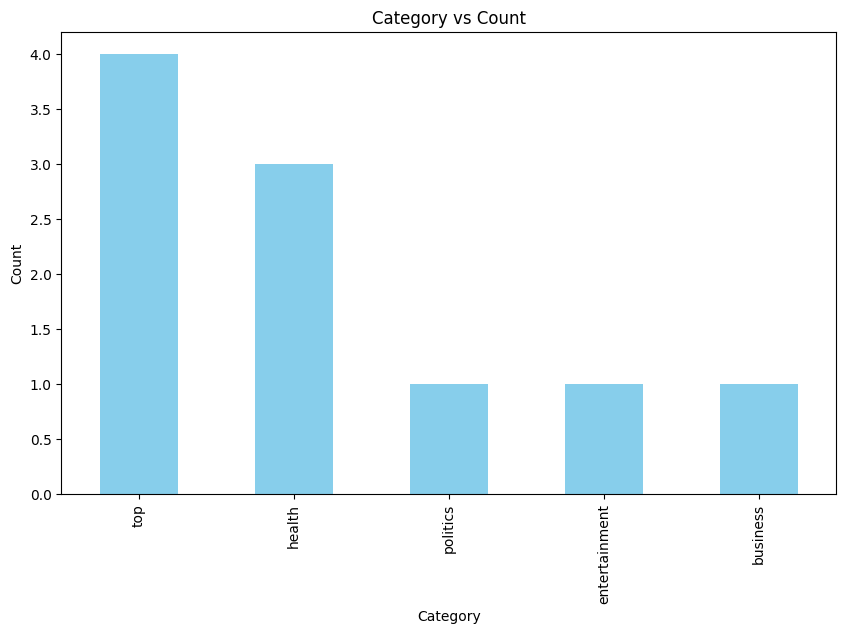

In [39]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def historical_news_data(api_key, keyword):
    url = f'https://newsdata.io/api/1/archive'
    params = {
        'apikey': api_key,
        'q': f'{keyword}',
        
    }

    res = requests.get(url, params=params)
    return res.json()

def process_historical_news_data(news_data):
    processed_data = []

   
    for result in news_data.get('results', []):
        processed_article = {
            'title': result.get('title', ''),
            'link': result.get('link', ''),
            'description': result.get('description', ''),
            'pubDate': result.get('pubDate', ''),
            'image_url': result.get('image_url', ''),
            'source_id': result.get('source_id', ''),
            'country': result.get('country', ''),
            'category': result.get('category', ''),
            'language': result.get('language', ''),
        }
        processed_data.append(processed_article)

    return processed_data

def main():
    country = input('Enter the country:')
    keyword = input('Enter the keyword:')
    api_key = 'pub_3281811b409ba8a50e99a88378593734a0757'
    url = f'https://newsdata.io/api/1/news?apikey={api_key}&q={keyword}'
    print()

    try:
        res = requests.get(url)
        news_data = res.json()

        # Print the raw API response for debugging
        #print("Raw API response:")
        #print(news_data)

        processed_data = process_historical_news_data(news_data)

        
        df = pd.DataFrame(processed_data)

        # Display the DataFrame
        print("DataFrame Data Types:")
        print(df.dtypes)
        

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        print("DataFrame:")
        print(df)
        


        df['pubDate'] = pd.to_datetime(df['pubDate'], errors='coerce')

        df['image_url'] = df['image_url'].astype(str)

        # Plotting bar chart for the 'category' column
        category_counts = df['category'].explode().value_counts()
        category_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
        plt.title('Category vs Count')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.show()


    except Exception as e:
        print(f'Error: {e}')

if __name__ == '__main__':
    main()